In [133]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import numpy as np

In [134]:
def plot_benchmark(file_name):
    x_axis = [i*10 for i in range(10)]
    means = []
    m_plus = []
    m_minus = []
    mins = []
    maxs = []
    with open("benchmark/"+file_name) as json_file:
        data = json.load(json_file)
        for d in sorted(list(data.items()), key=lambda x : int(x[0])):
            mean = d[1]['mean']
            means.append(mean)
            std = d[1]['std']
            m_plus.append(mean + std)
            m_minus.append(mean - std)
            mins.append(d[1]['min'])
            maxs.append(d[1]['max'])

    fig, (ax1,ax2) = plt.subplots(2,figsize=(15,15))
    ax1.plot(x_axis, means, "r",label="mean",)
    ax1.fill_between(x_axis, m_minus, m_plus, color='b', alpha=0.3)
    ax1.legend()
    ax2.plot(x_axis, means, "r", label="mean")
    ax2.plot(x_axis, maxs, "k", label="max")
    ax2.plot(x_axis, mins, "g", label="min")
    ax2.legend()

    plt.plot()

## Benchmark generate CA

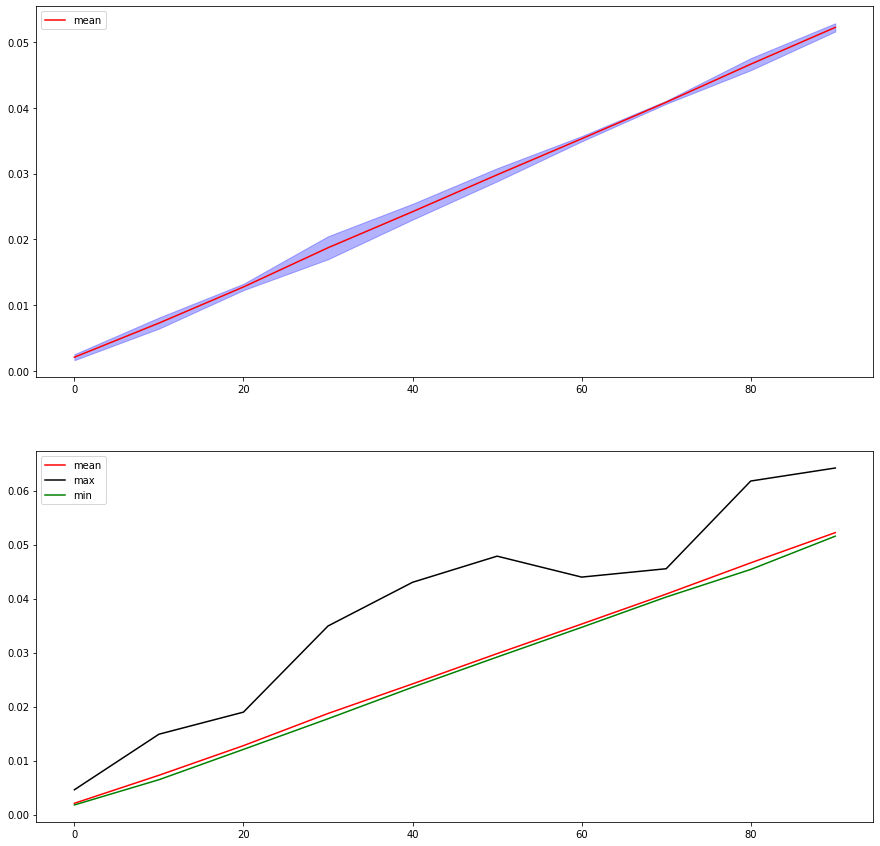

In [135]:
plot_benchmark("gen_ca.json")

## Benchmark prepare registration

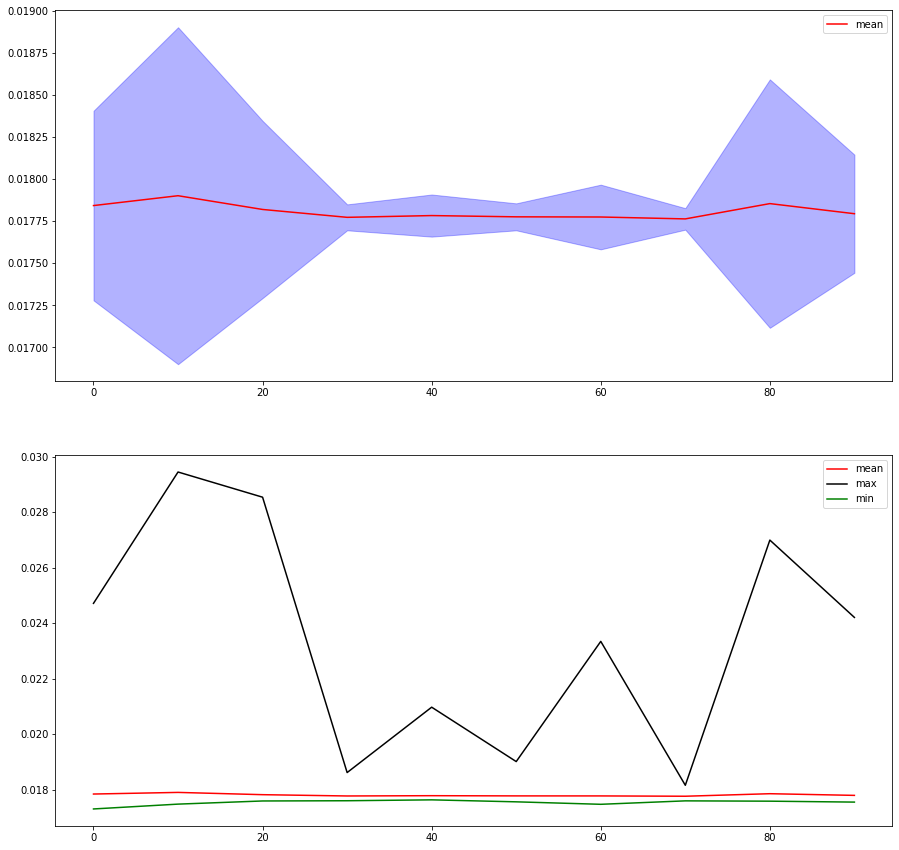

In [136]:
plot_benchmark("prepare_registration.json")

## Benchmark register

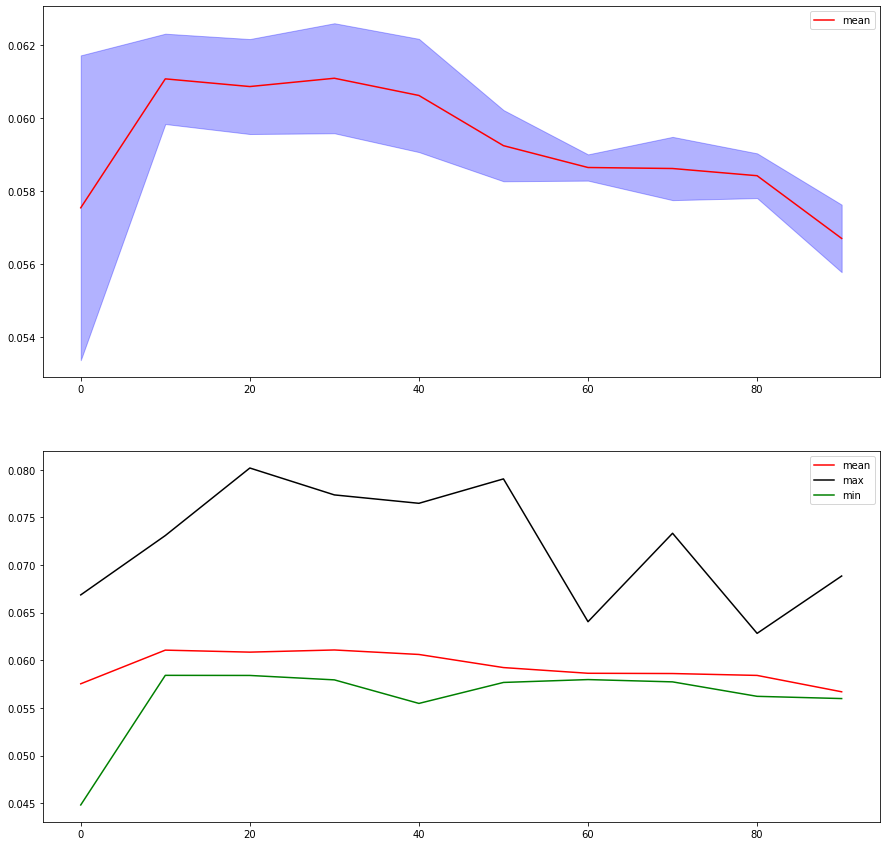

In [137]:
plot_benchmark("register.json")

## Benchmark proceed registration response

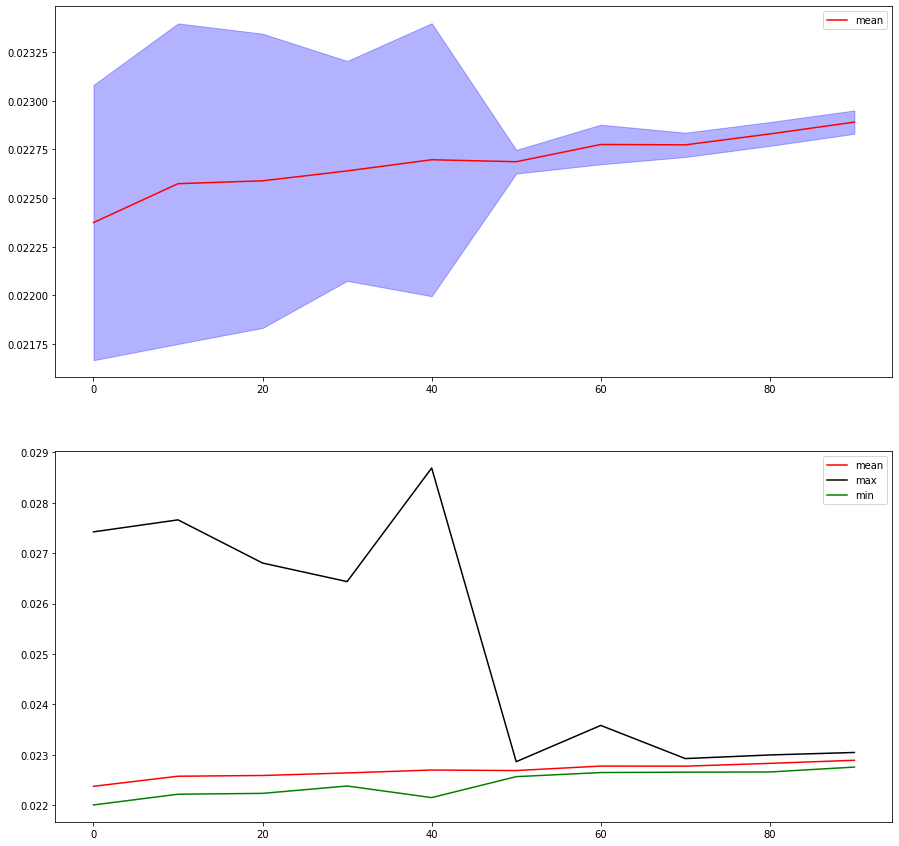

In [138]:
plot_benchmark("proceed_registration_response.json")

In [140]:
def heat_map(file_name):
    y_axis = list(range(90)) #revealed
    x_axis = [i*10 for i in range(10)] #nbr attributes
    with open("benchmark/"+file_name) as json_file:
        data = json.load(json_file)
        m = np.zeros((len(x_axis), len(y_axis)), dtype=float)
        m[1,0] = 2.0
        for n in data:
            for i,res in enumerate(data[n]):
                m[int(n),i] = res["mean"]
                
                
        plt.imshow(m,  cmap='viridis', interpolation='nearest',aspect='auto')
        plt.colorbar()
        plt.show()
        

## Benchmark sign request

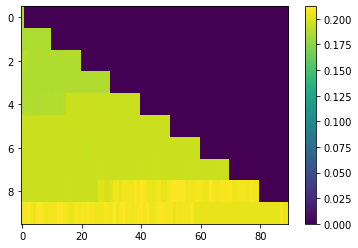

In [141]:
heat_map("sign_request.json")

## Benchmark check request signature

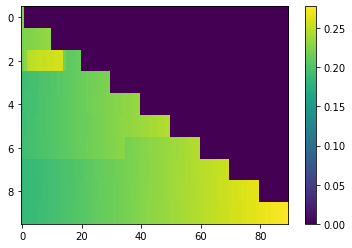

In [142]:
heat_map("check_request_signature.json")